In [2]:
import math

import scipy.constants
import scipy.stats
import scipy.optimize
import numpy

In [7]:
def mean(x0, t, mean_rev_speed, mean_rev_level):
    assert mean_rev_speed >= 0
    return x0 * numpy.exp(-mean_rev_speed * t) + (1.0 - numpy.exp(- mean_rev_speed * t)) * mean_rev_level


def ou0_mean(x0, t, mean_rev_speed):
    """ Mean function of an OU process defined as dX = -AXdt + vdB"""
    assert mean_rev_speed >= 0
    return x0 * numpy.exp(-mean_rev_speed * t)


def variance(t, mean_rev_speed, vola):
    assert mean_rev_speed >= 0
    assert vola >= 0
    return vola * vola * (1.0 - numpy.exp(- 2.0 * mean_rev_speed * t)) / (2 * mean_rev_speed)


def std(t, mean_rev_speed, vola):
    return numpy.sqrt(variance(t, mean_rev_speed, vola))

In [14]:
def path(x0, t, mean_rev_speed, mean_rev_level, vola):
    """ Simulates a sample path"""
    assert len(t) > 1
    x = scipy.stats.norm.rvs(size=len(t))
    x[0] = x0
    dt = numpy.diff(t)
    scale = numpy.sqrt(variance(dt, mean_rev_speed, vola))
    print(scale)
    x[1:] = x[1:] * scale
    for i in range(1, len(x)):
        x[i] += mean(x[i - 1], dt[i - 1], mean_rev_speed, mean_rev_level)
    return x

[0.00495041 0.00495041 0.00495041 ... 0.00495041 0.00495041 0.00495041]


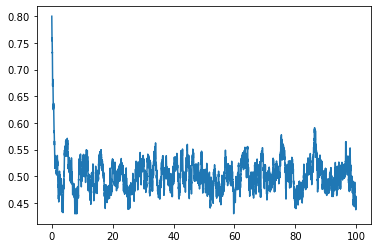

In [15]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

t = numpy.arange(0, 100, 0.01)
# simulate a path of the OU process on a given grid t, starting with x_0 = 0.8
x = path(0.8, t, 2.0, 0.5, 0.05)                                           
plt.plot(t,x)


In [32]:
def loglik(t, x, mean_rev_speed, mean_rev_level, vola):
    """Calculates log likelihood of a path"""
    dt = numpy.diff(t)
    mu = mean(x[:-1], dt, mean_rev_speed, mean_rev_level)
    print(mu[0])
    sigma = std(dt, mean_rev_speed, vola)
    print(sigma[0])
    plt.plot(scipy.stats.norm.logpdf(x[1:], loc=mu, scale=sigma))
    return numpy.sum(scipy.stats.norm.logpdf(x[1:], loc=mu, scale=sigma))

0.7993003498833626
0.00999500208270844


35630.75854625052

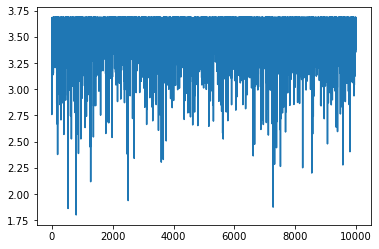

In [33]:
loglik(t, x, 0.1, 0.1, 0.1)

In [35]:
scipy.stats.norm.logpdf(numpy.arange(10), loc=0, scale=1)

array([ -0.91893853,  -1.41893853,  -2.91893853,  -5.41893853,
        -8.91893853, -13.41893853, -18.91893853, -25.41893853,
       -32.91893853, -41.41893853])

In [34]:
numpy.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])